In [1]:
import numpy as np
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 10)

In [2]:
def plot(Y_accepted, f, Y_rejected=None):
    nbins = 500
    y_accepted, x_accepted = np.histogram(Y_accepted, normed=True, bins=nbins)
    x_original = np.arange(min(Y_accepted), max(Y_accepted), 0.001)
    y_original = f(x_original)

    fig, ax = plt.subplots(nrows=1, ncols=2)
    ax[0].plot(x_accepted[:nbins], y_accepted, label='Accepted')
    
    if Y_rejected is not None:
        y_rejected, x_rejected = np.histogram(Y_rejected, normed=True, bins=nbins)
        ax[0].plot(x_rejected[:nbins], y_rejected, label='Rejected')
        
    ax[0].legend(loc='best')
    ax[0].set_title('Simulated')
    ax[1].plot(x_original, y_original)
    ax[1].set_title('Original')
    plt.show()

# Método de Aceptación-Rechazo Simple

In [3]:
def simple_accept_reject_method(f, max_point, xdomain=(0, 1), N=100000):
    if N < 1:
        raise ValueError("N parameter must be greater than 1.")
        
    Y_accepted = []
    Y_rejected = []

    for i in range(N):
        x = np.random.uniform(xdomain[0], xdomain[1])
        fx = f(x)
        u = np.random.uniform(0, max_point)

        if u <= fx:
            Y_accepted.append(x)
        else:
            Y_rejected.append(x) 
    
    return np.array(Y_accepted), np.array(Y_rejected)

# Método de Aceptación-Rechazo General

In [4]:
def is_envelope_function(f, g, M, xdomain=(0, 1), **kwargs):
    if xdomain[0] >= xdomain[1]:
        raise ValueError("First value of the xdomain must be lower than the second value.")
        
    x = np.arange(xdomain[0], xdomain[1], 0.001)
    y_base = f(x)
    y_envelope = g(x, **kwargs)
    
    return sum((y_envelope * M - y_base) < 0) == 0

In [5]:
def plot_envelope_function(f, g, M, xdomain=(0, 1), **kwargs):
    if xdomain[0] >= xdomain[1]:
        raise ValueError("First value of the xdomain must be lower than the second value.")
        
    x = np.arange(xdomain[0], xdomain[1], 0.001)
    y_base = f(x)
    y_envelope = g(x, **kwargs)
    
    plt.plot(x, y_base, label='Base function - f(x)')
    plt.plot(x, y_envelope * M, label='Envelope Function - g(x)')
    plt.legend(loc='best')
    plt.show()

In [6]:
def general_accept_reject_method(f, g, M, distrib_func, xdomain=None, N=100000, **kwargs):
    if N < 1:
        raise ValueError("N parameter must be greater than 1.")
        
    Y_accepted = []
    Y_rejected = []
    
    y = distrib_func(size=N, **kwargs)
    
    if xdomain is not None:
        if xdomain[0] >= xdomain[1]:
            raise ValueError("First value of the xdomain must be lower than the second value.")
        y = y[(y > xdomain[0]) & (y < xdomain[1])]

    for i in y:
        fy = f(i)
        gy = g(i, **kwargs)
        u = np.random.uniform(0, 1)

        if u <= fy / (M * gy):
            Y_accepted.append(i)
        else:
            Y_rejected.append(i)
            
    return np.array(Y_accepted), np.array(Y_rejected)

# Ejercicios

#### 1. Simula mediante el método simple de aceptación−rechazo una variable aleatoria X con función de densidad $ f(x) = 20x(1 - x)^3 $ donde $ x \in [0, 1] $.

$$ max \left\{20x(1 - x)^3\right\} = \frac{135}{64} \quad \text{en} \quad x = \frac{1}{4} $$

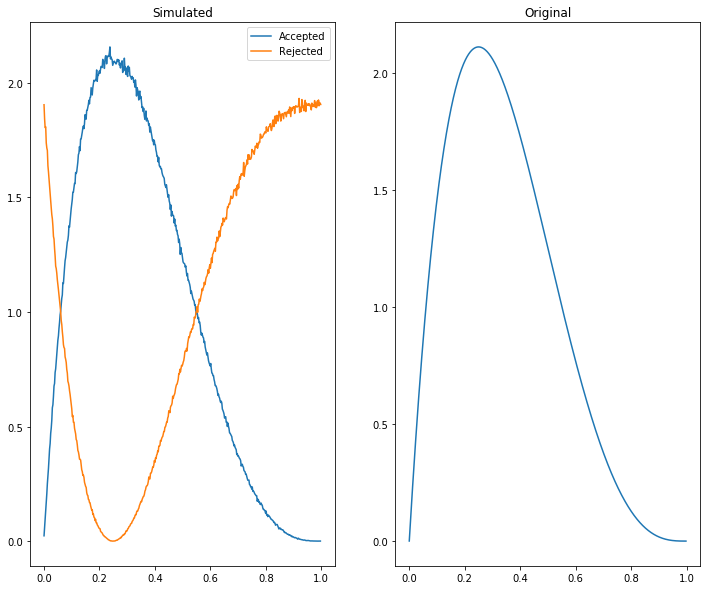

In [7]:
f = lambda x: 20 * x * (1 - x)**3
max_point = 135/64
N = 10**7

Y_accepted, Y_rejected = simple_accept_reject_method(f, max_point, N=N)
        
plot(Y_accepted, f, Y_rejected)

#### 2. Simula una variable aleatoria $ X \sim \beta(3, 5) $ donde la función de densidad viene dada por:

$$ f_x = \left\{ \begin{array}{ll}{105x^2 (1-x)^4} & {\text{si }}{x \in (0,1)} \\ {0} & {\text{en otro caso}} \end{array} \right. $$

$$ max \left\{105x^2 (1-x)^4\right\} = \frac{560}{243} \quad \text{en} \quad x = \frac{1}{3} $$

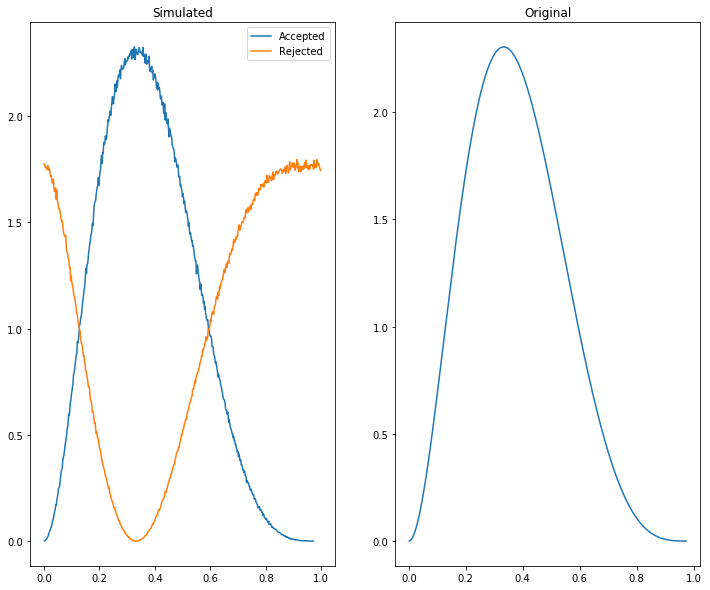

In [8]:
f = lambda x: 105 * (x**2) * ((1-x)**4)
max_point = 560/243
N = 10**7

Y_accepted, Y_rejected = simple_accept_reject_method(f, max_point, N=N)

plot(Y_accepted, f, Y_rejected)

#### 3. Aplica el método de aceptación−rechazo general para simular una variable aleatoria $ X \sim N(0, 1) $ a partir de una $ Y \sim Cauchy(0, 1) $.

$$ f_X(x) = \frac{1}{\sqrt{2\pi}} e^{\left(\frac{-x^2}{2}\right)} $$

$$ g_Y(x) = \frac{1}{\pi (1 + x^2)} $$

para todo $ x \in \mathbb{R} $. Veamos que existe $ M \in (1, \infty) $ tal que $ f_X(x) \leq M g_Y(x) $ para todo $ x \in \mathbb{R} $. En efecto, la función

$$ h(x) = \frac{\frac{1}{\sqrt{2\pi}} e^{\left(\frac{-x^2}{2}\right)}}{\frac{1}{\pi (1 + x^2)}} $$

admite los puntos críticos $ x_1 = 0, x_2 = 1, x_3 = -1 $ y alcanza el máximo en $ x_2 $ y $ x_3 $ con $ h(1) = h(-1) = \sqrt{\frac{2\pi}{e}} $. Por lo tanto, $ M = \sqrt{\frac{2\pi}{e}} $.

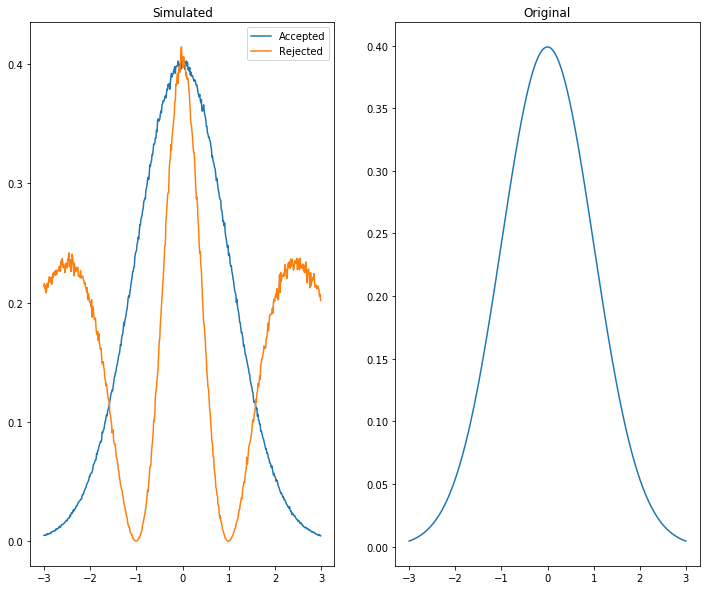

In [9]:
f = lambda x: (1 / np.sqrt(2 * np.pi)) * (np.e**((-x**2) / 2))
g = lambda x: 1 / (np.pi * (1 + (x**2))) # = st.cauchy.pdf
M = np.sqrt((2 * np.pi) / np.e)
N = 10**7

Y_accepted, Y_rejected = general_accept_reject_method(f, g, M,
                                                      np.random.standard_cauchy, 
                                                      xdomain=(-3, 3), 
                                                      N=N)
        
plot(Y_accepted, f, Y_rejected)

#### 4. Simula una variable aleatoria $ X \sim N(0, 1) $ mediante una variable logística $ Y \sim L(0, 1)$ como envolvente.

$$ f_X(x) = \frac{1}{\sqrt{2\pi}} e^{\left(\frac{-x^2}{2}\right)} $$

$$ g_Y(x) = \frac{1}{(e^{-x} + 1)^2} e^{-x} $$

para todo $ x \in \mathbb{R} $. Veamos que existe $ M \in (1, \infty) $ tal que $ f_X(x) \leq M g_Y(x) $ para todo $ x \in \mathbb{R} $. En efecto, la función

$$ h(x) = \frac{\frac{1}{\sqrt{2\pi}} e^{\left(\frac{-x^2}{2}\right)}}{\frac{1}{(e^{-x} + 1)^2} e^{-x}} $$

alcanza el máximo en $ h(0) = 2 \sqrt{\frac{2}{\pi}} $. Por lo tanto, $ M = 2 \sqrt{\frac{2}{\pi}} $.

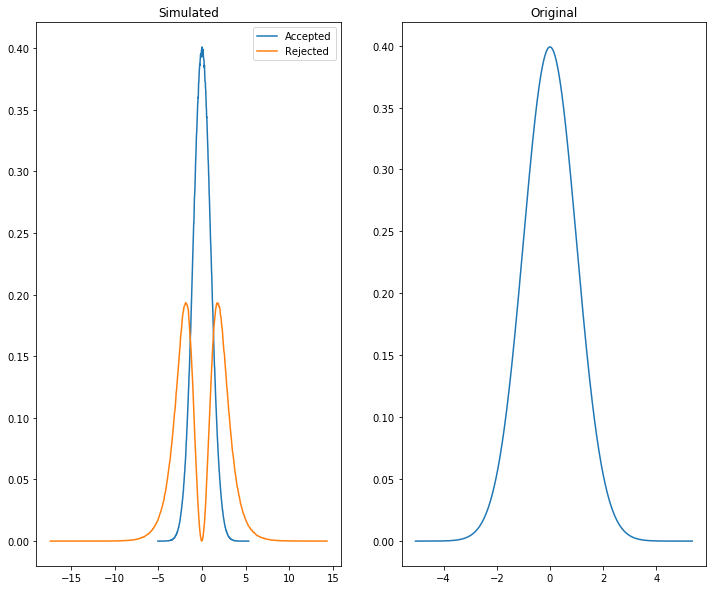

In [10]:
f = lambda x: (1 / np.sqrt(2 * np.pi)) * (np.e**((-x**2) / 2))
g = lambda x: (1 / ((np.e**(-x)) + 1)**2) * (np.e**(-x)) # = st.logistic.pdf
M = 2 * np.sqrt(2 / np.pi)
N = 10**7

Y_accepted, Y_rejected = general_accept_reject_method(f, g, M, 
                                                      np.random.logistic, 
                                                      N=N)

plot(Y_accepted, f, Y_rejected)

#### 5. Simula una variable aleatoria $ X \sim \beta(2.7, 6.3) $ mediante otra variable beta $ Y \sim \beta(2, 6) $ como envolvente.

La función de densidad de una variable aleatoria $ X \sim \beta(\alpha, \beta) $ viene dada por

$$ f_X(\alpha, \beta) = \frac{x^{\alpha - 1} (1-x)^{\beta - 1}}{B(\alpha, \beta)} = \frac{x^{\alpha - 1} (1-x)^{\beta - 1}}{\frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}} $$

donde

$$ \Gamma(n) = (n - 1)! $$


Para las variables aleatorias $ X \sim \beta(2.7, 6.3) \ $ y $ \ Y \sim \beta(2, 6) $, sus funciones de densidad vienen dadas por

$$ f_X(x) = \left\{ \begin{array}{ll}{129.339 \ x^{1.7} (1-x)^{5.3}} & {\text{si }}{x \in (0,1)} \\ {0} & {\text{en otro caso}} \end{array} \right. $$

$$$$

$$ g_Y(x) = \left\{ \begin{array}{ll}{42 \ x (1-x)^5} & {\text{si }}{x \in (0,1)} \\ {0} & {\text{en otro caso}} \end{array} \right. $$

para todo $ x \in \mathbb{R} $. Veamos que existe $ M \in (1, \infty) $ tal que $ f_X(x) \leq M g_Y(x) $ para todo $ x \in \mathbb{R} $. En efecto, la función

$$ h(x) = \frac{129.339 \ x^{1.7} (1-x)^{5.3}}{42 \ x (1-x)^5} $$

alcanza el máximo en $ h(0.7) = 1.6718 $. Por lo tanto, $ M = 1.6718 $.

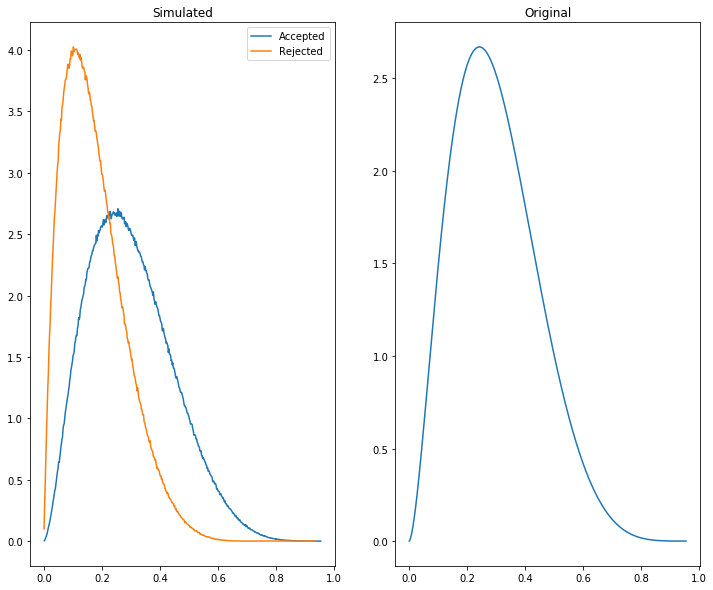

In [11]:
f = lambda x: 129.339 * (x**1.7) * ((1-x)**5.3)
g = lambda x, a, b: 42 * x * ((1-x)**5) # = st.beta.pdf
M = 1.6718
N = 10**7

Y_accepted, Y_rejected = general_accept_reject_method(f, g, M, 
                                                      np.random.beta, 
                                                      N=N, 
                                                      a=2, b=6)

plot(Y_accepted, f, Y_rejected)

#### 6. La función de densidad

$$ f(x) = e^{(-x^2 / 2)} \ \ (sin((6x)^2) + 3 \ cos(x^2) \ sin((4x)^2) + 1) $$

**puede ser generada utilizando el algoritmo de aceptación - rechazo.**

**a) Comprueba gráficamente que $ f(x) $ está acotada por $ Mg(x) $, donde $ g(x) $ es la densidad normal estándar $ g(x) = \frac{e^{(-x^2 / 2)}}{\sqrt{2 \pi}} $. Encuentra un aceptable, no necesariamente óptimo, valor de $M$.**

¿Está f(x) acotada por Mg(x)? --> True


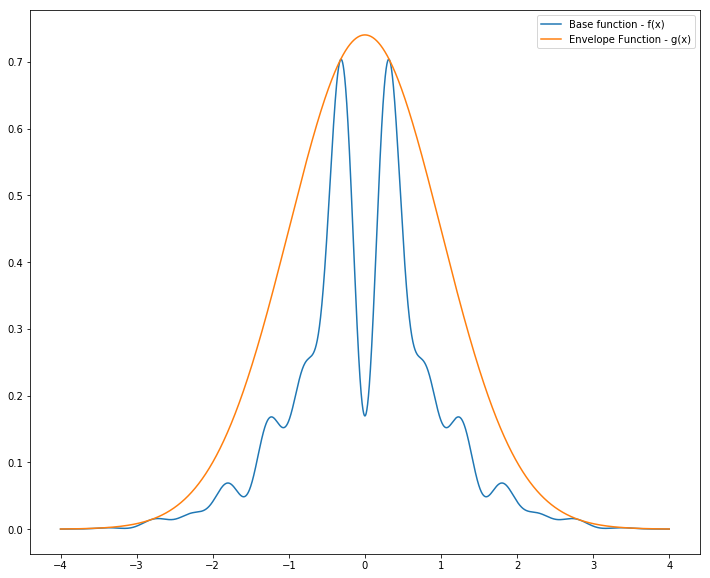

In [12]:
f = lambda x: (np.e**(-x**2 / 2) * (np.sin(6*x)**2 + 3 * np.cos(x)**2 * np.sin(4*x)**2 + 1)) / 5.89434
g = lambda x: (np.e**(-x**2 / 2) / np.sqrt(2 * np.pi)) # = st.norm.pdf
M = 1.8561

print('¿Está f(x) acotada por Mg(x)? -->', is_envelope_function(f, g, M, xdomain=(-4, 4)))

plot_envelope_function(f, g, M, xdomain=(-4, 4))

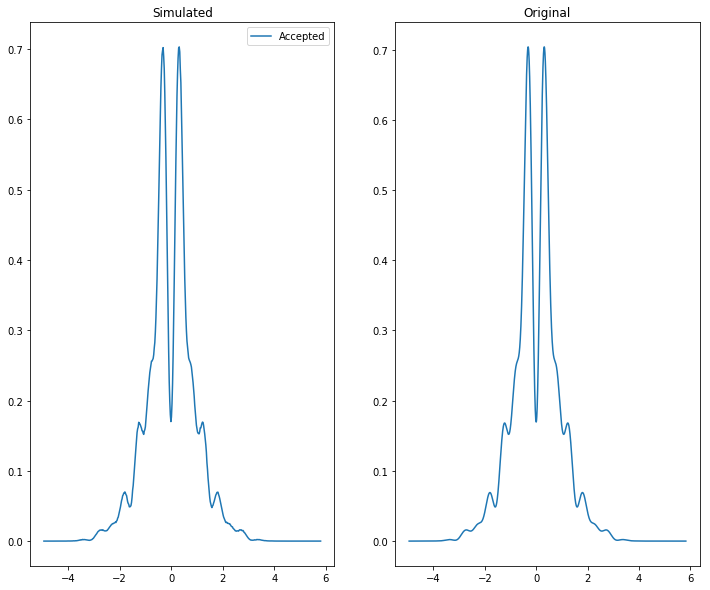

In [13]:
N = 10**7

Y_accepted, Y_rejected = general_accept_reject_method(f, g, M, 
                                                      np.random.normal, 
                                                      N=N)

plot(Y_accepted, f)

**b) Generar 2500 variables aleatorias mediante una variable $ Y \sim N(0, 1) $ como envolvente.**